In [23]:
#dataframes
import pandas as pd

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import sys
sys.path.append("../")
import odor_stat_calculations as osc


#plots
import pylab as plt
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from figurefirst import FigureLayout,mpl_functions
import figurefirst
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc

import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7


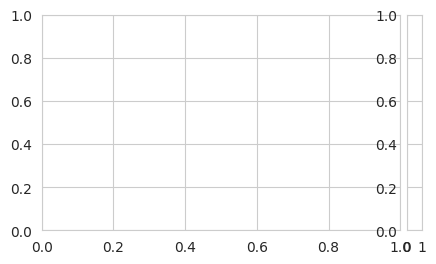

In [24]:
def load():
    layout = fifi.svg_to_axes.FigureLayout('../../Figure2/intermittency.svg', autogenlayers=True, make_mplfigures=True, hide_layers=[])
    return layout
# path="/home/vbl/DataAnalysis/data/simulator/figure/Figure_tracking/"
layout = load()

In [25]:
fdf=pd.read_hdf("/home/vbl/DataAnalysis/data/simulator/algorithm/whiff.h5")
x_bins = np.arange(0, 51, 5)
y_bins = np.arange(-15, 16, 5)

# Calculate mean intermittency for each bin
mean_intermittency = np.zeros((len(y_bins)-1, len(x_bins)-1))

for i in range(len(x_bins)-1):
    for j in range(len(y_bins)-1):
        mask = ((fdf.avg_distance_along_streakline >= x_bins[i]) & 
                (fdf.avg_distance_along_streakline < x_bins[i+1]) &
                (fdf.avg_nearest_from_streakline >= y_bins[j]) & 
                (fdf.avg_nearest_from_streakline < y_bins[j+1]))
        if mask.any():
            mean_intermittency[j, i] = fdf[mask].odor_intermittency.mean()
        else:
            mean_intermittency[j, i] = np.nan

In [26]:
ax=layout.axes[('fig1','ax1')]
# im = ax.imshow(mean_intermittency, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],
#                    origin='lower',
#                    aspect='auto',
#                    cmap='RdYlBu_r',
#                    vmin=0,
#                    vmax=2, rasterized=True)
ax.scatter(fdf.avg_distance_along_streakline,fdf.avg_nearest_from_streakline, c=fdf.odor_intermittency, 
           cmap='viridis',s=2, vmin=0,vmax=2, rasterized=True)

ax.set_rasterization_zorder(-20)


for x in x_bins:
    ax.axvline(x=x, color='black', linestyle='--', linewidth=0.1,alpha=1, rasterized=True)
for y in y_bins:
    ax.axhline(y=y, color='black', linestyle='--', linewidth=0.1, alpha=1, rasterized=True)




ax.grid(False)
mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-15,-10,15],
                           xticks=[0,5,50],
                           linewidth=0.5)

ax.set_xlabel('x, m')
ax.xaxis.set_label_coords(0.5, -0.07)
ax.set_ylabel('y, m')
ax.yaxis.set_label_coords(-0.05, 0.5)
# ax.set_xticklabels([])
# ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/intermittency.svg')


In [27]:

ax = layout.axes[('fig1', 'cbar_inter')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='viridis', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("Intermittency, s",rotation=-90, labelpad=-15)

ax.set_yticklabels(['0', '2'])
ax.tick_params(axis='y', pad=1) 

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/intermittency.svg')